In [3]:
import numpy as np
import pandas as pd
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]

a=pd.Series([12,23,45,67,89,64,19,20],index=index_val)
a

(cse, 2019)    12
(cse, 2020)    23
(cse, 2021)    45
(cse, 2022)    67
(ece, 2019)    89
(ece, 2020)    64
(ece, 2021)    19
(ece, 2022)    20
dtype: int64

In [4]:
a[('cse',2019)]

np.int64(12)

In [5]:
a[('cse')]

KeyError: 'cse'

In [7]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiIndex=pd.MultiIndex.from_tuples(index_val)
multiIndex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [10]:
multiIndex.levels[1]

Index([2019, 2020, 2021, 2022], dtype='int64')

In [12]:
multiIndex2=pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])
multiIndex2

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [13]:
a=pd.Series([12,23,45,67,89,64,19,20],index=multiIndex)
a

cse  2019    12
     2020    23
     2021    45
     2022    67
ece  2019    89
     2020    64
     2021    19
     2022    20
dtype: int64

In [20]:
a['cse',2022]

np.int64(67)

In [21]:
a['cse']

2019    12
2020    23
2021    45
2022    67
dtype: int64

In [17]:
### unstack -> convert the multiIndex series to dataframe

temp=a.unstack()
temp

,2019,2020,2021,2022
cse,12,23,45,67
ece,89,64,19,20


In [18]:
## stack -> convert the datafrem into multiIndex series
temp.stack()

cse  2019    12
     2020    23
     2021    45
     2022    67
ece  2019    89
     2020    64
     2021    19
     2022    20
dtype: int64

In [22]:
multiIndex_df=pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index=multiIndex,
    columns=["avg_package","student"]
)

multiIndex_df

avg_package  student
cse 2019            1        2
    2020            3        4
    2021            5        6
    2022            7        8
ece 2019            9       10
    2020           11       12
    2021           13       14
    2022           15       16

In [24]:
multiIndex_df.loc['cse']["avg_package"]

2019    1
2020    3
2021    5
2022    7
Name: avg_package, dtype: int64

In [26]:
multiIndex_df["student"]

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: student, dtype: int64

In [ ]:
## multi cols...
multicols_df=pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index=[2019,2020,2021,2022],
    columns=pd.MultiIndex.from_product([["delhi",'kolkata'],["avg_package","students"]])    
)

multicols_df   ## 3d -> 2d

delhi              kolkata         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [29]:
multicols_df["delhi"]['avg_package']

2019    1
2020    3
2021    5
2022    7
Name: avg_package, dtype: int64

In [32]:
multicols_df.loc[2022]

delhi    avg_package    7
         students       8
kolkata  avg_package    0
         students       0
Name: 2022, dtype: int64

In [33]:
multicols_df.loc[2022]["delhi"]

avg_package    7
students       8
Name: 2022, dtype: int64

In [ ]:
## multi index and cols
multiIdxCols=pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index=multiIndex,
    columns=pd.MultiIndex.from_product([["delhi",'kolkata'],["avg_package","students"]])
)

multiIdxCols  ### 4D data -> represent to 2D using multiindex 

delhi              kolkata         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### stacking and unstacking 

In [ ]:
### stacking and unstacking 
multiIndex_df.unstack() ## unstack -> inner index convert into inner cols

avg_package                student               
           2019 2020 2021 2022    2019 2020 2021 2022
cse           1    3    5    7       2    4    6    8
ece           9   11   13   15      10   12   14   16

In [ ]:
### stacking and unstacking 
multiIndex_df.unstack().unstack() ## unstack -> inner index convert into inner cols
## if there is one index then convert into multiindex series

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
student      2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [ ]:
multiIndex_df.unstack().stack() ### stack -> inner col convert into inner index

C:\Users\susov\AppData\Local\Temp\ipykernel_9708\2301640382.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  multiIndex_df.unstack().stack()


avg_package  student
cse 2019            1        2
    2020            3        4
    2021            5        6
    2022            7        8
ece 2019            9       10
    2020           11       12
    2021           13       14
    2022           15       16

In [ ]:
multiIndex_df.unstack().stack().stack() ### stack -> inner col convert into inner index
## if there is one col then convert into multiindex series

C:\Users\susov\AppData\Local\Temp\ipykernel_9708\2266477234.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  multiIndex_df.unstack().stack().stack() ### stack -> inner col convert into inner index


cse  2019  avg_package     1
           student         2
     2020  avg_package     3
           student         4
     2021  avg_package     5
           student         6
     2022  avg_package     7
           student         8
ece  2019  avg_package     9
           student        10
     2020  avg_package    11
           student        12
     2021  avg_package    13
           student        14
     2022  avg_package    15
           student        16
dtype: int64

In [ ]:
multicols_df.stack() ## 
# multicols_df.unstack() ##  multiIndex series 

C:\Users\susov\AppData\Local\Temp\ipykernel_9708\109671898.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  multicols_df.stack()


delhi    avg_package  2019    1
                      2020    3
                      2021    5
                      2022    7
         students     2019    2
                      2020    4
                      2021    6
                      2022    8
kolkata  avg_package  2019    0
                      2020    0
                      2021    0
                      2022    0
         students     2019    0
                      2020    0
                      2021    0
                      2022    0
dtype: int64

In [47]:
multicols_df.stack().stack()

C:\Users\susov\AppData\Local\Temp\ipykernel_9708\3016798255.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  multicols_df.stack().stack()


2019  avg_package  delhi      1
                   kolkata    0
      students     delhi      2
                   kolkata    0
2020  avg_package  delhi      3
                   kolkata    0
      students     delhi      4
                   kolkata    0
2021  avg_package  delhi      5
                   kolkata    0
      students     delhi      6
                   kolkata    0
2022  avg_package  delhi      7
                   kolkata    0
      students     delhi      8
                   kolkata    0
dtype: int64

In [50]:
multiIdxCols.unstack().unstack()

delhi    avg_package  2019  cse     1
                            ece     9
                      2020  cse     3
                            ece    11
                      2021  cse     5
                            ece    13
                      2022  cse     7
                            ece    15
         students     2019  cse     2
                            ece    10
                      2020  cse     4
                            ece    12
                      2021  cse     6
                            ece    14
                      2022  cse     8
                            ece    16
kolkata  avg_package  2019  cse     0
                            ece     0
                      2020  cse     0
                            ece     0
                      2021  cse     0
                            ece     0
                      2022  cse     0
                            ece     0
         students     2019  cse     0
                            ece     0
            

In [54]:
multiIdxCols.stack().stack()

C:\Users\susov\AppData\Local\Temp\ipykernel_9708\2044063351.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  multiIdxCols.stack().stack()


cse  2019  avg_package  delhi       1
                        kolkata     0
           students     delhi       2
                        kolkata     0
     2020  avg_package  delhi       3
                        kolkata     0
           students     delhi       4
                        kolkata     0
     2021  avg_package  delhi       5
                        kolkata     0
           students     delhi       6
                        kolkata     0
     2022  avg_package  delhi       7
                        kolkata     0
           students     delhi       8
                        kolkata     0
ece  2019  avg_package  delhi       9
                        kolkata     0
           students     delhi      10
                        kolkata     0
     2020  avg_package  delhi      11
                        kolkata     0
           students     delhi      12
                        kolkata     0
     2021  avg_package  delhi      13
                        kolkata     0
           s

In [55]:
multiIdxCols.shape

(8, 4)

In [56]:
multiIdxCols.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   (delhi, avg_package)    8 non-null      int64
 1   (delhi, students)       8 non-null      int64
 2   (kolkata, avg_package)  8 non-null      int64
 3   (kolkata, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [57]:
multiIdxCols.unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, cse to ece
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   (delhi, avg_package, 2019)    2 non-null      int64
 1   (delhi, avg_package, 2020)    2 non-null      int64
 2   (delhi, avg_package, 2021)    2 non-null      int64
 3   (delhi, avg_package, 2022)    2 non-null      int64
 4   (delhi, students, 2019)       2 non-null      int64
 5   (delhi, students, 2020)       2 non-null      int64
 6   (delhi, students, 2021)       2 non-null      int64
 7   (delhi, students, 2022)       2 non-null      int64
 8   (kolkata, avg_package, 2019)  2 non-null      int64
 9   (kolkata, avg_package, 2020)  2 non-null      int64
 10  (kolkata, avg_package, 2021)  2 non-null      int64
 11  (kolkata, avg_package, 2022)  2 non-null      int64
 12  (kolkata, students, 2019)     2 non-null      int64
 13  (kolkata, students, 2020)     2 non-null

In [58]:
multiIdxCols.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [60]:
multiIdxCols.loc[('cse',2020)]

delhi    avg_package    3
         students       4
kolkata  avg_package    0
         students       0
Name: (cse, 2020), dtype: int64

In [61]:
multiIdxCols.loc[('cse',2021):('ece',2022):2]

delhi              kolkata         
         avg_package students avg_package students
cse 2021           5        6           0        0
ece 2019           9       10           0        0
    2021          13       14           0        0

In [62]:
multiIdxCols.iloc[0:5:2]

delhi              kolkata         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [63]:
multiIdxCols["delhi",'avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: (delhi, avg_package), dtype: int64

In [65]:
multiIdxCols.iloc[:,1:3]

delhi     kolkata
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [67]:
multiIdxCols.iloc[0:5:4,1:3]

,,delhi,kolkata
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [68]:
## sorting  in multiIndex

multiIdxCols.sort_index(ascending=False)

delhi              kolkata         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [69]:
multiIdxCols.sort_index(ascending=[True,False])

delhi              kolkata         
         avg_package students avg_package students
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0

In [ ]:
multiIdxCols.sort_index(level=1,ascending=True) ## base on year sort 

delhi              kolkata         
         avg_package students avg_package students
cse 2019           1        2           0        0
ece 2019           9       10           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2022           7        8           0        0
ece 2022          15       16           0        0

In [72]:
multiIdxCols.transpose() ### cnvert indexs into cols and cols into indexs 

cse                 ece               
                    2019 2020 2021 2022 2019 2020 2021 2022
delhi   avg_package    1    3    5    7    9   11   13   15
        students       2    4    6    8   10   12   14   16
kolkata avg_package    0    0    0    0    0    0    0    0
        students       0    0    0    0    0    0    0    0

In [73]:
## swaplevel -> inner convert into outer , outer convert into inner
multiIdxCols.swaplevel()

delhi              kolkata         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [74]:
multiIdxCols.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi     kolkata  kolkata
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Long Vs Wide Data
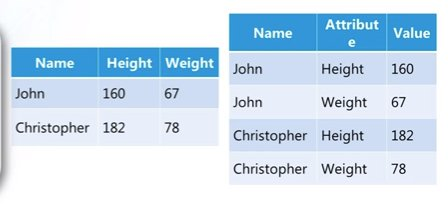

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [5]:
pd.DataFrame({'cse':[23,89,90],"me":[24,76,39],"it":[24,98,76]})

,cse,me,it
0,23,24,24
1,89,76,98
2,90,39,76


In [3]:
# melt -> simple example branch -> wide to long
import pandas as pd
pd.DataFrame({'cse':[23,89,90],"me":[24,76,39],"it":[24,98,76]}).melt()


,variable,value
0,cse,23
1,cse,89
2,cse,90
3,me,24
4,me,76
5,me,39
6,it,24
7,it,98
8,it,76


In [4]:
pd.DataFrame({'cse':[23,89,90],"me":[24,76,39],"it":[24,98,76]}).melt(var_name='Branch',value_name="avg_package")


,Branch,avg_package
0,cse,23
1,cse,89
2,cse,90
3,me,24
4,me,76
5,me,39
6,it,24
7,it,98
8,it,76


In [6]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,80,70


In [9]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=["branch"],var_name="year",value_name="avg_packages")

,branch,year,avg_packages
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [18]:
## test case 

deth=pd.read_csv("time_series_covid19_deaths_global.csv")
confirm=pd.read_csv("time_series_covid19_confirmed_global.csv")



In [ ]:
deth.head()  ### wide format data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [12]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [19]:
## convert into long format
deth=deth.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="date",value_name="deth_count")
confirm=confirm.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="date",value_name="confirm_count")

In [20]:
merge_df=confirm.merge(deth,on=["Province/State","Country/Region","Lat","Long","date"])

In [21]:
merge_df

,Province/State,Country/Region,Lat,Long,date,confirm_count,deth_count
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


## pivit Table

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.groupby('sex')[['total_bill']].mean()

C:\Users\susov\AppData\Local\Temp\ipykernel_18408\2388094044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [7]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

C:\Users\susov\AppData\Local\Temp\ipykernel_18408\884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [ ]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')## aggfunc=mean default

C:\Users\susov\AppData\Local\Temp\ipykernel_18408\1243499625.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [9]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')

C:\Users\susov\AppData\Local\Temp\ipykernel_18408\3627826641.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [12]:
df.pivot_table(index='sex',columns='smoker',values=['size',"tip",'total_bill'])

C:\Users\susov\AppData\Local\Temp\ipykernel_18408\3174143849.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values=['size',"tip",'total_bill'])


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [ ]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')

C:\Users\susov\AppData\Local\Temp\ipykernel_18408\4109034156.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [14]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':"mean",'total_bill':'sum',"tip":'count'})

C:\Users\susov\AppData\Local\Temp\ipykernel_18408\364153106.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':"mean",'total_bill':'sum',"tip":'count'})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000    10   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721    20   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000     7   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429    24   

                                   ...              total_bill                \
day                    Fri         ...   Sun              Thur           Fri   
time          Dinner Lunch Dinner  ... Lunch Dinner      Lunch Dinner  Lunch   
sex    smoker                      ...                                         
Male   Yes         0     3      5  ...     0     15     191.71   0.00  34.16   
       No          0     0      2  ...     0     43     369.73   0.00   0.00   
Female Yes         0     3      4  ...     0      4     134.53   0.00  39.78   
       No          1     1      1  ...     0     14     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54  

[4 rows x 22 columns]

In [15]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

C:\Users\susov\AppData\Local\Temp\ipykernel_18408\521140019.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [16]:
cost_df=pd.read_csv("expense_data.csv")
cost_df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [17]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [ ]:
cost_df['Date']=pd.to_datetime(cost_df["Date"])

In [ ]:
cost_df["Month"]=cost_df["Date"].dt.month_name()

In [22]:
cost_df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [26]:
cost_df.pivot_table(index='Month',columns="Category",values='INR',aggfunc="sum",fill_value=0,margins=True)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation,All
Month,,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0,28644.44
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8,36064.65
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0,40320.51
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0,1125.00
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0,7623.40
All,14000.0,3388.0,196.0,1400.0,24502.48,115.0,12188.0,37868.0,3.0,8000.0,400.0,2513.72,9203.8,113778.00


<Axes: xlabel='Month'>

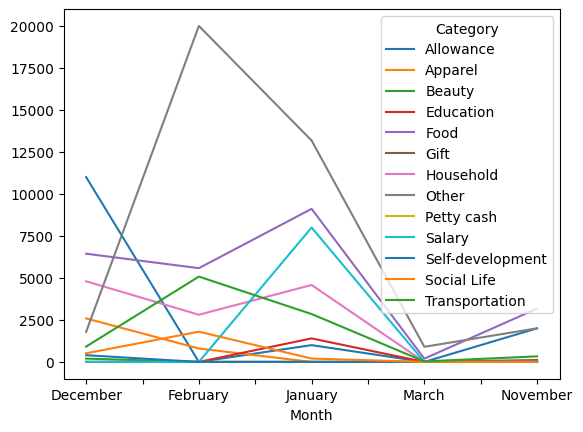

In [25]:
cost_df.pivot_table(index='Month',columns="Category",values='INR',aggfunc="sum",fill_value=0).plot()

In [28]:
cost_df.pivot_table(index='Month',columns="Income/Expense",values='INR',aggfunc="sum",fill_value=0,margins=True)

Income/Expense,Expense,Income,All
Month,,,
December,16334.44,12310.0,28644.44
February,17864.65,18200.0,36064.65
January,20679.51,19641.0,40320.51
March,525.00,600.0,1125.00
November,3620.40,4003.0,7623.40
All,59024.00,54754.0,113778.00


<Axes: xlabel='Month'>

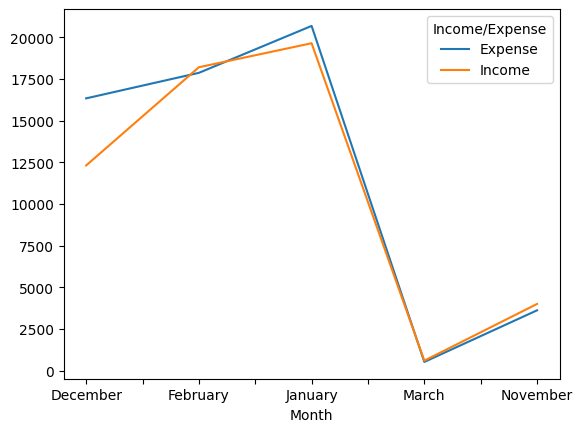

In [27]:
cost_df.pivot_table(index='Month',columns="Income/Expense",values='INR',aggfunc="sum",fill_value=0).plot()